# Customer Segmentation

## Problem Statement:
A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site.  This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on. The machine learning clustering algorithms can provide an analytical method to cluster customers with similar interests.

## Data Definition:

Input variables:

1) **Cust_ID** Unique numbering for customers

2) **Gender:** Gender of the customer


3) **Orders:** Number of orders placed by each customer in the past


Remaining 35 features contains the number of times customers have searched them

## Exploratory Data Analysis and Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from warnings import filterwarnings

In [2]:
filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
df = pd.read_excel("Project 11 - K Means Clustering/Dataset/cust_data.xlsx")
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

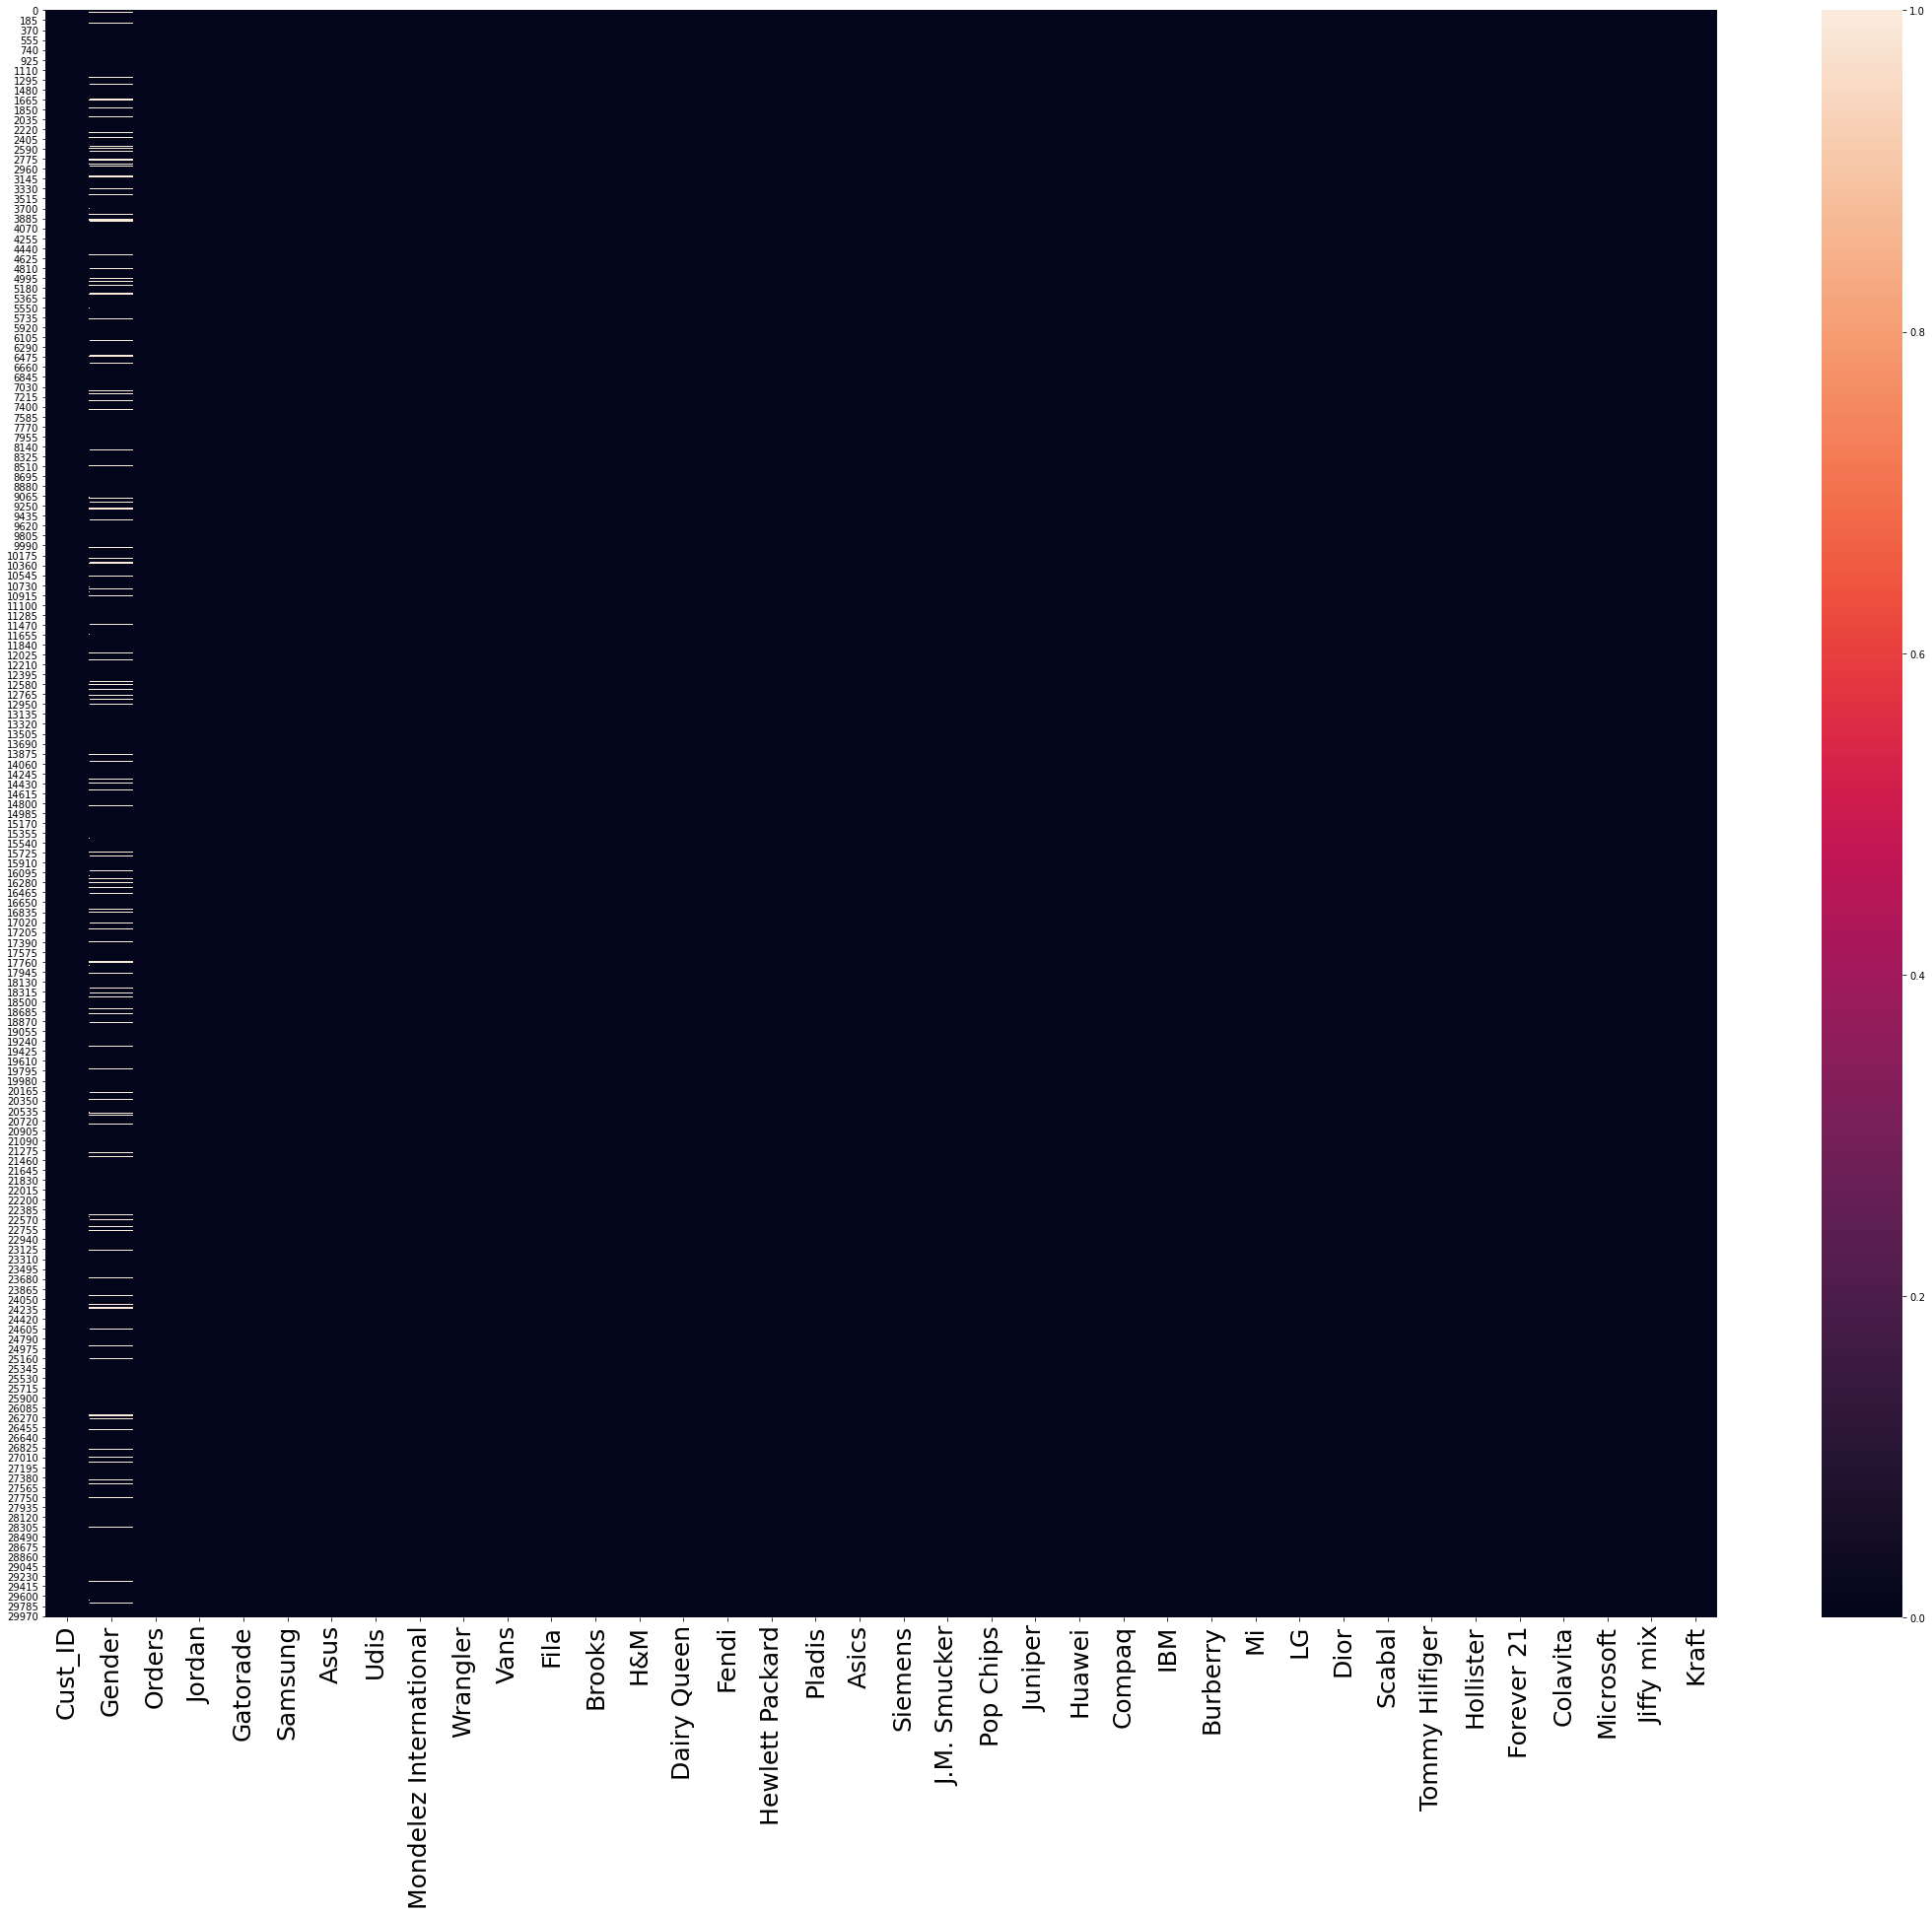

In [6]:
plt.figure(figsize = (38,30))
sns.heatmap(df.isnull())
plt.xticks(fontsize = 25)
plt.show()

In [7]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [8]:
df.describe(include = "object")

,Gender
count,27276
unique,2
top,F
freq,22054


In [9]:
# U represents as an unknown gender
df.Gender.fillna("U", inplace = True)

In [10]:
df.isnull().sum().sum()

0

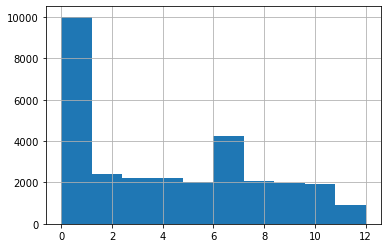

In [11]:
df.Orders.hist()
plt.show()

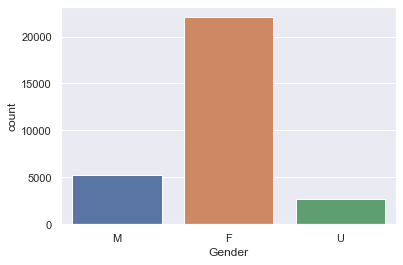

In [12]:
sns.set()
sns.countplot(df.Gender)
plt.show()

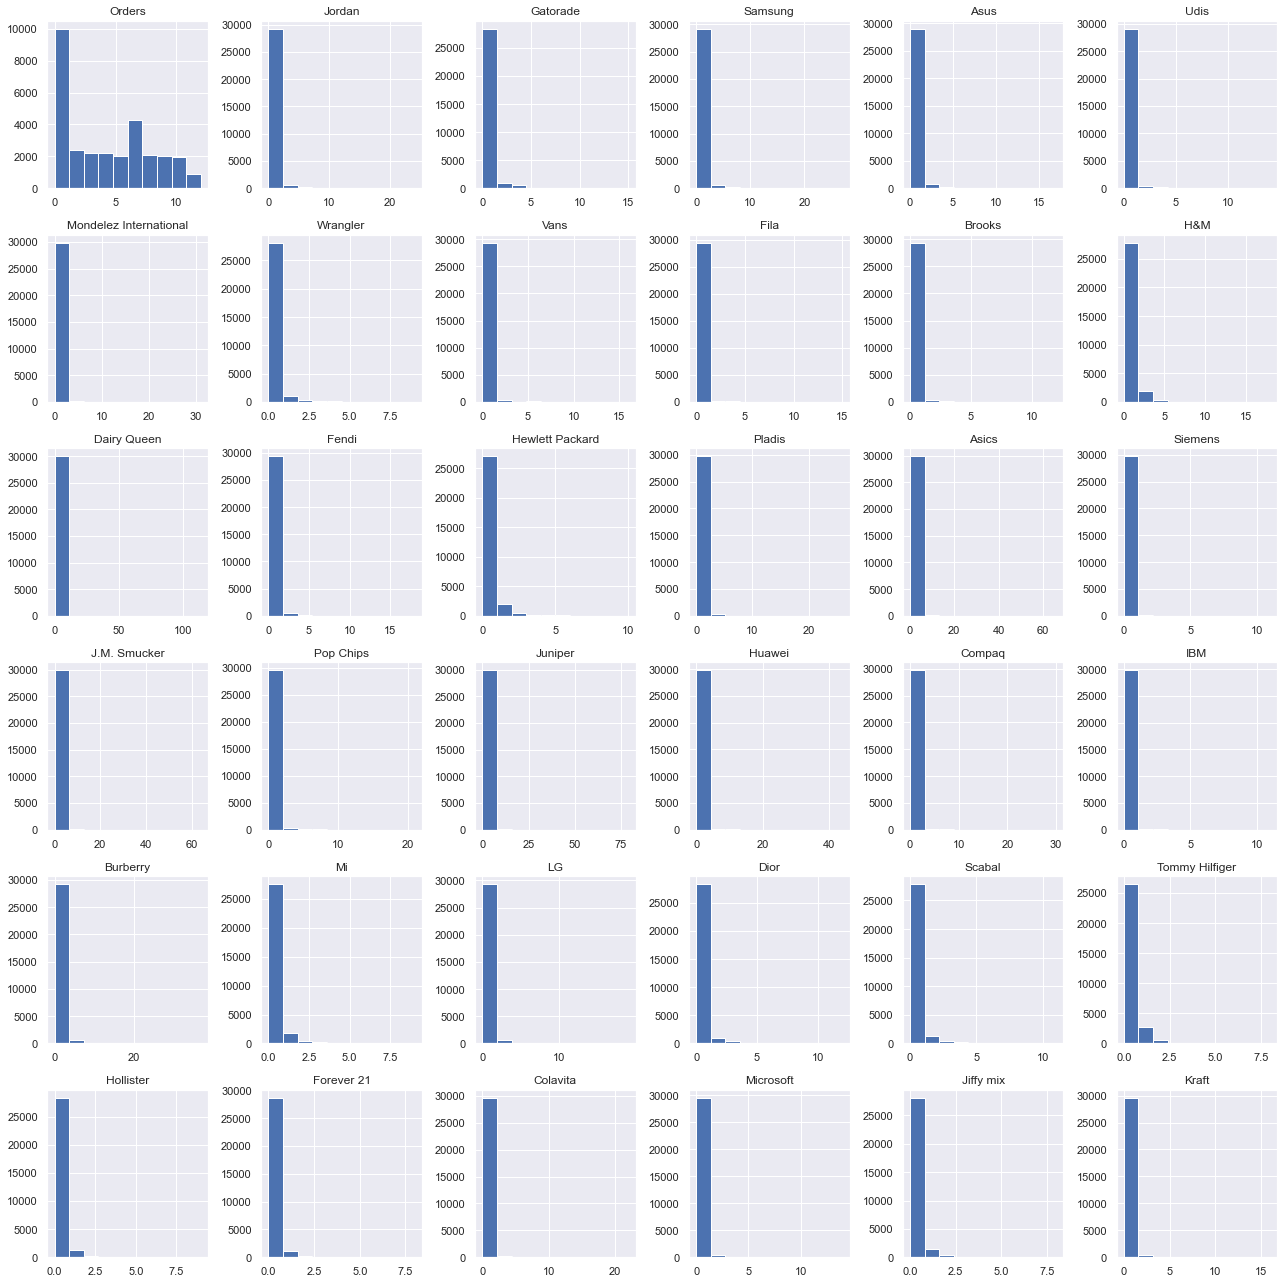

In [13]:
df.drop("Cust_ID", axis = 1).hist(figsize = (18,18))
plt.tight_layout()
plt.show()

In [14]:
final = StandardScaler().fit_transform(df.drop(["Cust_ID","Gender","Orders"], axis = 1))
final_df = pd.DataFrame(final, columns = df.drop(["Cust_ID","Gender","Orders"], axis = 1).columns)
final_df

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.707974,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


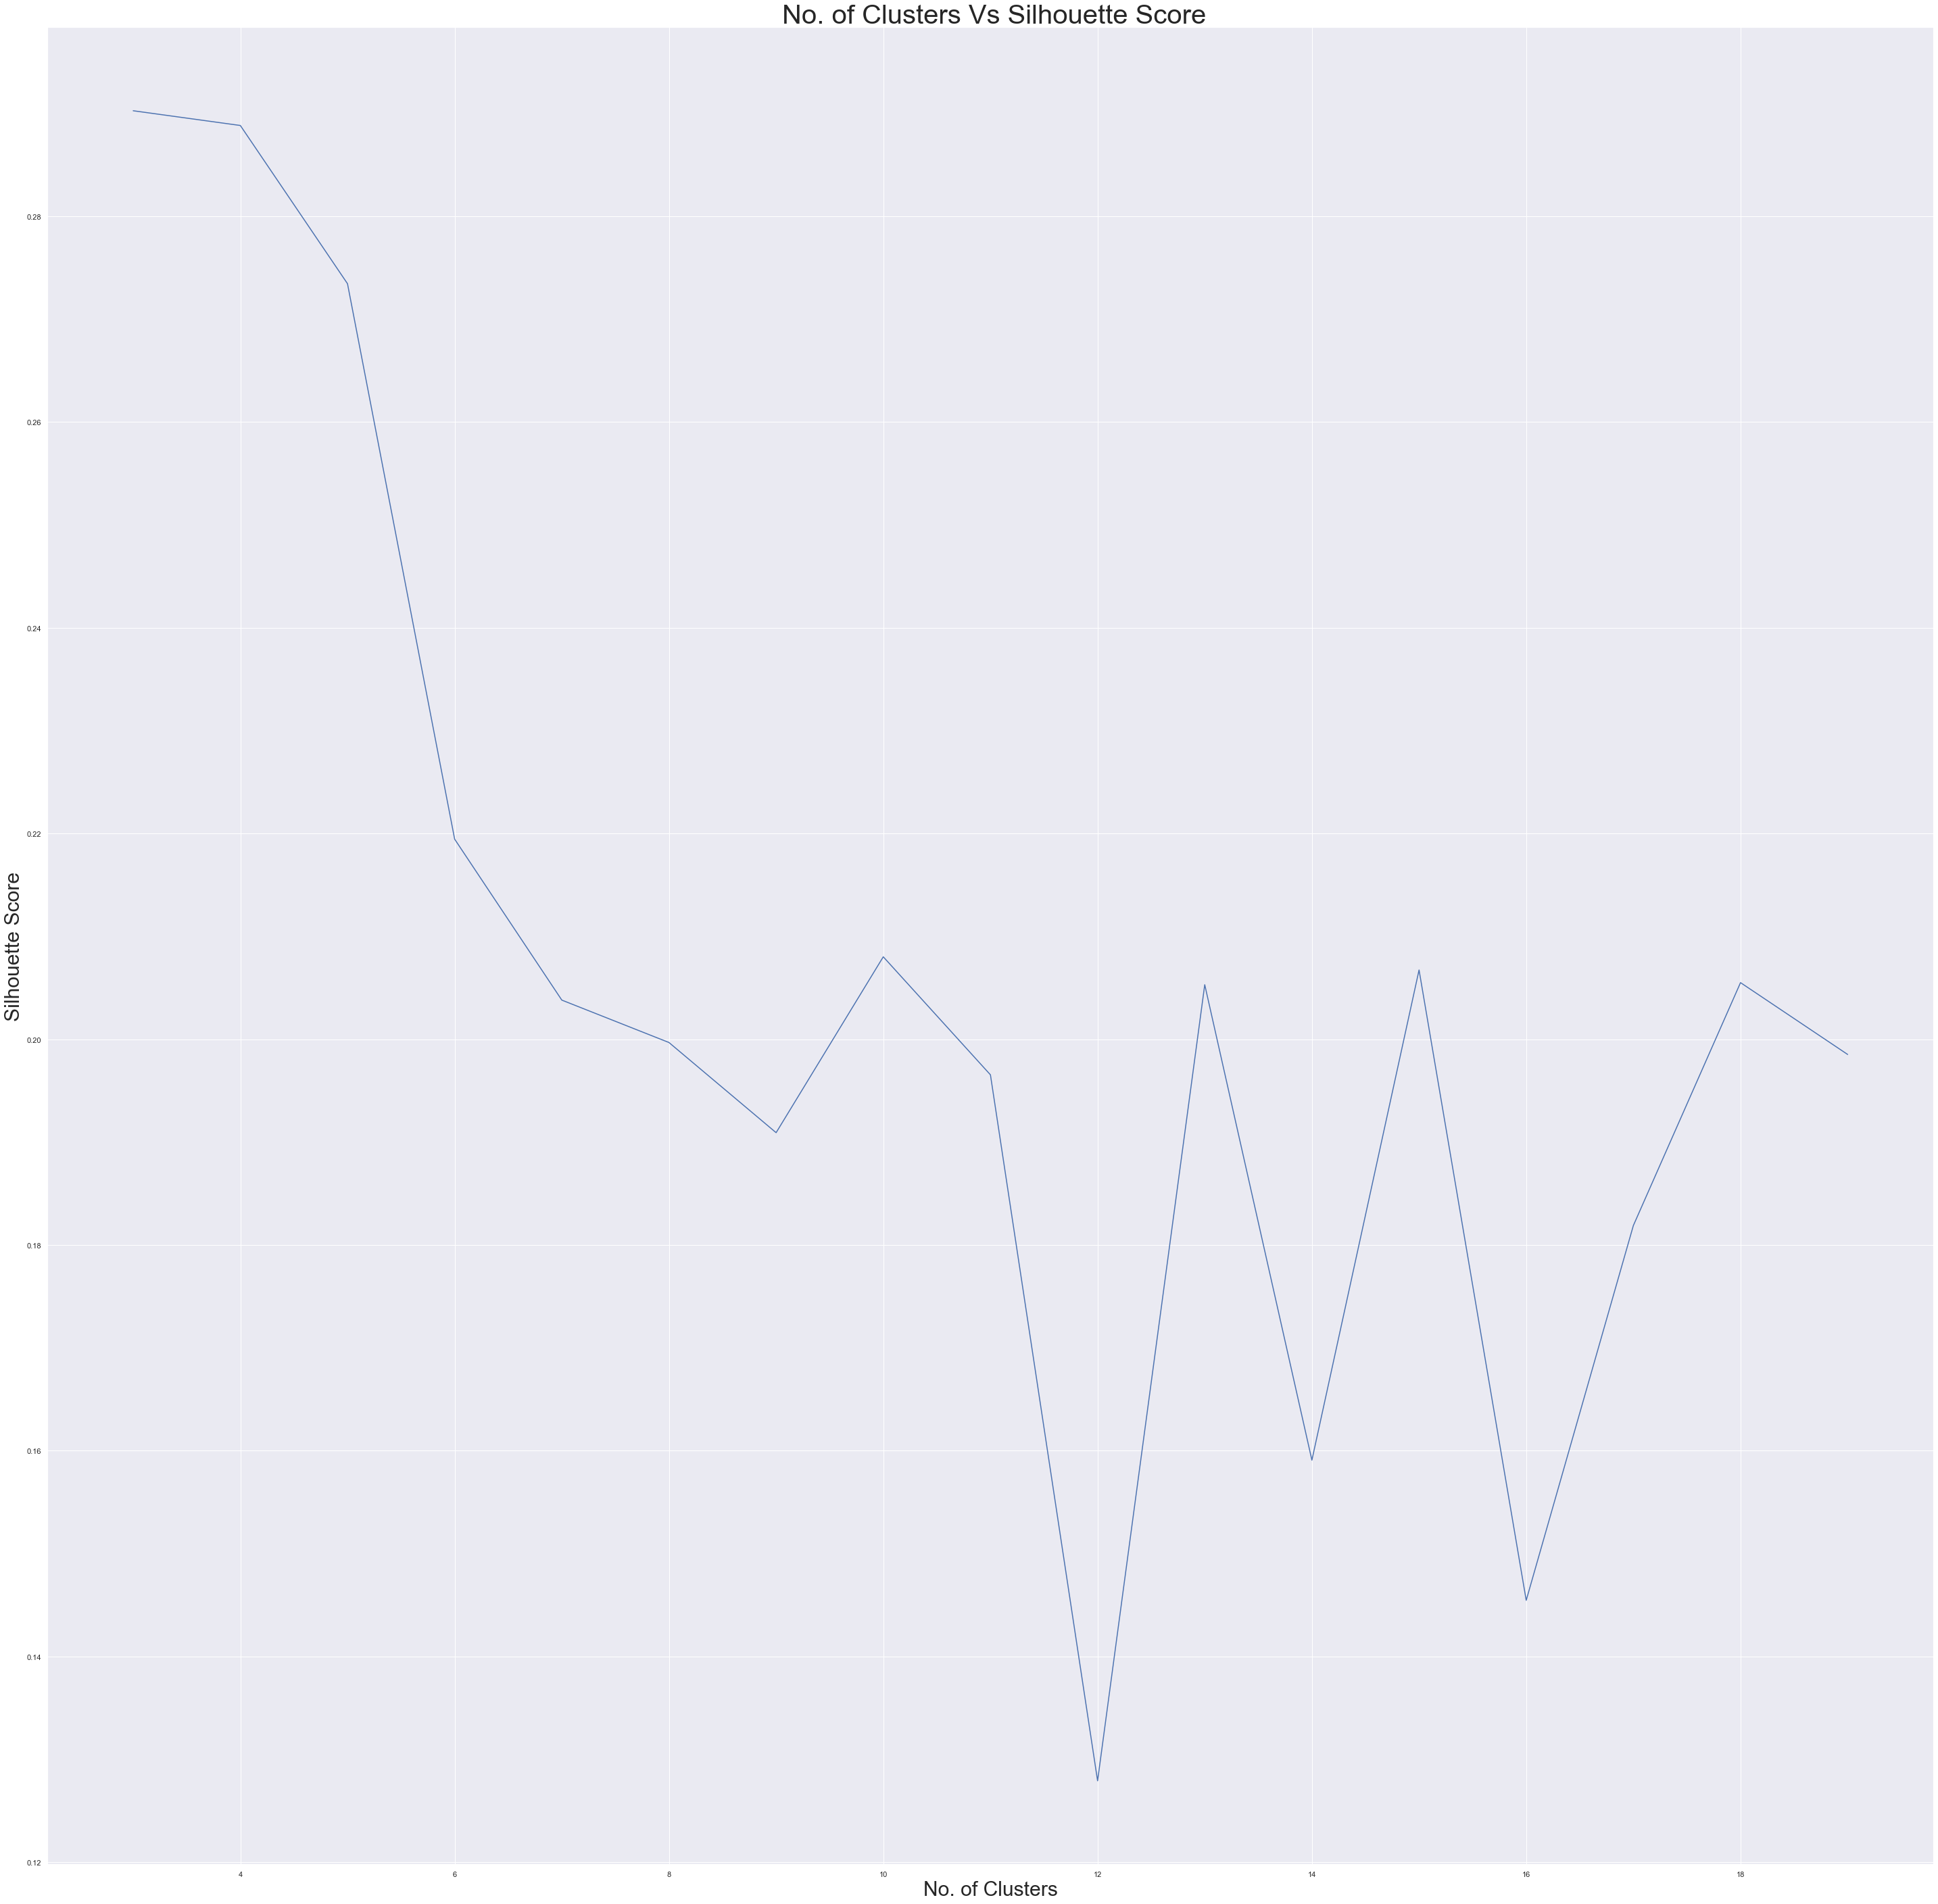

In [15]:
n_comps = list(range(3,20))
sil_score = []
for i in range(3,20):
    km = KMeans(n_clusters = i, random_state = 10)
    predict = km.fit_predict(final_df)
    sil_score.append(silhouette_score(final_df,predict, random_state = 10))
fig, ax = plt.subplots(figsize = (50,50))
plt.plot(n_comps, sil_score)
plt.xlabel("No. of Clusters", fontsize = 30)
plt.ylabel("Silhouette Score", fontsize = 30)
plt.title(" No. of Clusters Vs Silhouette Score", fontsize = 40)
plt.show()

In [16]:
km = KMeans(n_clusters = 4, random_state = 10)
km_model = km.fit(final_df)

In [17]:
final_df["cluster"] = km_model.labels_
final_df = pd.concat([df.Cust_ID,final_df], axis = 1)
final_df

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1
1,2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,2
2,3,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775,1
3,4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1
4,5,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.707974,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1
29996,29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1
29997,29998,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1
29998,29999,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1


In [18]:
final_df.cluster.value_counts()

1    22772
2     5272
0     1255
3      701
Name: cluster, dtype: int64

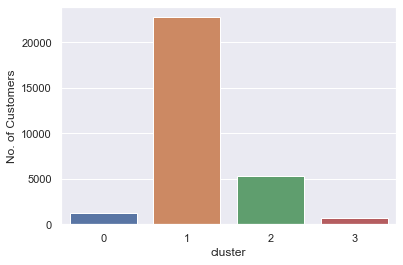

In [19]:
sns.countplot(final_df.cluster)
plt.ylabel("No. of Customers")
plt.show()

In [28]:
cluster_df = pd.concat([final_df, df["Gender"]], axis = 1)
cluster_df = pd.get_dummies(cluster_df)
cluster_df

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster,Gender_F,Gender_M,Gender_U
0,1,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1,0,1,0
1,2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,2,1,0,0
2,3,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775,1,0,1,0
3,4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1,1,0,0
4,5,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.707974,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1,0,1,0
29996,29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1,0,1,0
29997,29998,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1,0,1,0
29998,29999,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1,0,1,0


## Cluster Analysis

In [20]:
centers = pd.DataFrame(km_model.cluster_centers_, columns = final_df.columns[1:36])
centers

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,0.625607,1.907329,0.616519,0.225042,2.568363,0.365394,-0.024283,1.207535,1.386412,0.361136,0.139219,0.106599,0.032785,2.556671,0.447053,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,-0.158799,-0.091024,-0.068992,-0.055305,-0.123492,-0.120399,-0.114161,-0.112618,-0.095141,-0.087916,-0.126187,-0.056312,-0.017300,-0.185835,-0.094772,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,0.543847,-0.050482,0.153836,0.199526,-0.067101,-0.066405,-0.114408,0.149411,0.065418,0.285404,0.504460,0.214274,0.067360,0.206156,0.298087,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,-0.042512,-0.077589,-0.016627,-0.103615,-0.081134,3.757106,4.612421,0.376242,0.118643,0.067765,0.064143,0.030423,-0.002204,-0.085748,0.041534,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


In [21]:
cluster3 = pd.DataFrame(sorted(zip(list(centers.iloc[0,:]), list(centers.columns)),reverse = True)[:10])[1]
cluster3

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

#### "Grocery" Cluster

In [31]:
cluster_df[["Gender_F","Gender_M"]][cluster_df.cluster == 0].describe()

,Gender_F,Gender_M
count,1255.000000,1255.000000
mean,0.821514,0.120319
std,0.383074,0.325464
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [22]:
cluster_1 = pd.DataFrame(sorted(zip(centers.iloc[1,:], centers.columns),reverse = True)[:10])[1]
cluster_1

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

#### "Mixed Basket" Cluster

In [32]:
cluster_df[["Gender_F","Gender_M"]][cluster_df.cluster == 1].describe()

,Gender_F,Gender_M
count,22772.000000,22772.000000
mean,0.705691,0.195547
std,0.455741,0.396630
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [23]:
cluster_2 = pd.DataFrame(sorted(zip(centers.iloc[2,:], centers.columns),reverse = True)[:10])[1]
cluster_2

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

#### "Apparels" Cluster

In [34]:
cluster_df[["Gender_F","Gender_M"]][cluster_df.cluster == 2].describe()

,Gender_F,Gender_M
count,5272.000000,5272.000000
mean,0.845220,0.089340
std,0.361729,0.285261
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [24]:
cluster3 = pd.DataFrame(sorted(zip(centers.iloc[3,:], centers.columns),reverse = True)[:10])[1]
cluster3

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

#### "Electronics and IT" Cluster

In [37]:
cluster_df[["Gender_F","Gender_M"]][cluster_df.cluster == 3].describe()

,Gender_F,Gender_M
count,701.000000,701.000000
mean,0.708987,0.209700
std,0.454554,0.407385
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000
